# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [4]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

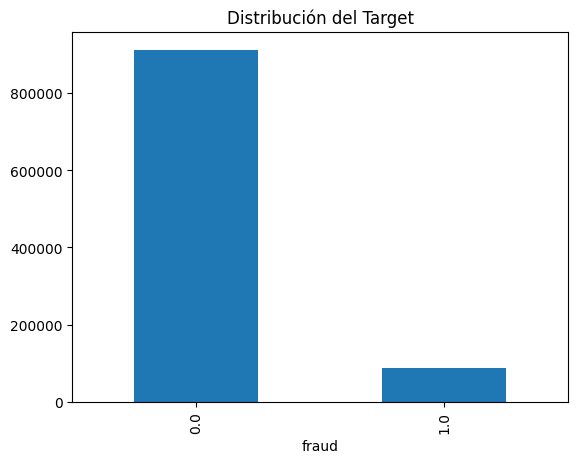

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


In [5]:
fraud['fraud'].value_counts().plot(kind='bar', title='Distribución del Target')
plt.show()

print(fraud['fraud'].value_counts(normalize=True))


In [6]:
# Separar features y target
X = fraud.drop("fraud", axis=1)
y = fraud["fraud"]

# Split + Escalado
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo base
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
pred = log_reg.predict(X_test_scaled)

# Evaluación
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228149
         1.0       0.90      0.60      0.72     21851

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



In [7]:
# Crear DataFrame combinando X_train escalado con y_train
train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
train["fraud"] = y_train.values

# Separar clases
minority = train[train["fraud"] == 1]
majority = train[train["fraud"] == 0]

# Oversample (duplicamos la clase minoritaria)
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=0)
train_over = pd.concat([minority_oversampled, majority])

# Entrenamiento
X_train_over = train_over.drop("fraud", axis=1)
y_train_over = train_over["fraud"]

log_reg.fit(X_train_over, y_train_over)
pred = log_reg.predict(X_test_scaled)
print("OVERSAMPLE")
print(classification_report(y_test, pred))



c:\Users\Dixon\Documents\IronHack\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


OVERSAMPLE
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228149
         1.0       0.58      0.95      0.72     21851

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [ ]:
# Undersample (se reduce la clase mayoritaria)
majority_undersampled = resample(majority, replace=False, n_samples=len(minority), random_state=0)
train_under = pd.concat([majority_undersampled, minority])

# Entrenamiento
X_train_under = train_under.drop("fraud", axis=1)
y_train_under = train_under["fraud"]

log_reg.fit(X_train_under, y_train_under)
pred = log_reg.predict(X_test_scaled)
print("UNDERSAMPLE")
print(classification_report(y_test, pred))


c:\Users\Dixon\Documents\IronHack\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


UNDERSAMPLE
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228149
         1.0       0.58      0.95      0.72     21851

    accuracy                           0.94    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.94      0.94    250000



In [17]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
sm = SMOTE(random_state=1, sampling_strategy=1.0)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

log_reg.fit(X_train_sm, y_train_sm)
pred = log_reg.predict(X_test_scaled)
print("SMOTE")
print(classification_report(y_test, pred))



SMOTE
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228149
         1.0       0.58      0.95      0.72     21851

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

